# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 3. Сравнение оценок и эффективные оценки
### Дедлайн --- 13 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.


В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека `scipy.stats`. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 15 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [210]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'sample']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Задача 1

Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [211]:
color_for_normal=sns.color_palette("colorblind")[0]
color_for_laplace=sns.color_palette("colorblind")[1]
color_for_cauchy=sns.color_palette("colorblind")[2]

N=500

norm_distr = sps.norm()
laplacian_distr = sps.laplace()
cauchy_distr = sps.cauchy()
np.random.seed(2020)
#YOUR CODE GOES HERE

norm_sample = sps.norm().rvs(N)
laplacian_sample = sps.laplace().rvs(N)
cauchy_sample = sps.cauchy().rvs(N)

Постройте график плотности распределения для всех трех распределений на одних осях.

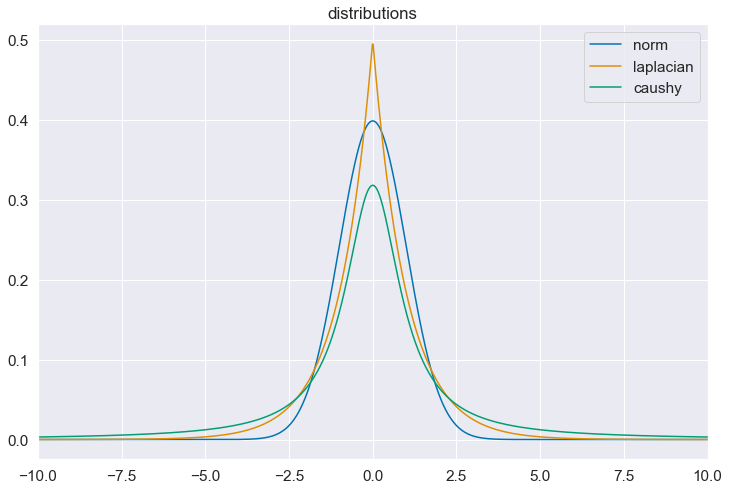

In [212]:
#YOUR CODE GOES HERE
plt.figure(figsize=(12, 8))
plt.title("distributions")

x = np.linspace(-10, 10, 1000)

plt.plot(x, norm_distr.pdf(x), color=color_for_normal, label='norm')
plt.plot(x, laplacian_distr.pdf(x), color=color_for_laplace, label='laplacian')
plt.plot(x, cauchy_distr.pdf(x), color=color_for_cauchy, label='caushy')


plt.xlim(-10, 10)
plt.legend()
plt.show()

Подумайте для каких распределений сложнее найти значение математического ожидания по выборке? Почему?

**Ответ:** Чтобы посчитать матож с одинаковой точностью для распределения с большей дисперсией нужна больше выборка, а с меньшей дисперсией - меньше выборка. Значит, сложнее посчитать матож для распределений с большой дисперсией.

Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики.

In [213]:
import math

def truncated_mean(sample, alpha=0.3):
    #YOUR CODE GOES HERE
    sorted_sample = np.array(sorted(sample))
    n = len(sorted_sample)
    return sorted_sample[math.ceil(alpha * n) : math.trunc(n - alpha * n - 1)].mean()

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Напишите функцию, которая это делает.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [214]:
from scipy.integrate import quad

def asymp_var(distr, alpha):
    #YOUR CODE GOES HERE
    quantile = distr.ppf(1 - alpha)
    integral = quad(lambda x: x**2 * distr.pdf(x), 0, quantile)[0]
    return 2 * (integral + alpha * quantile**2) / (1 - 2 * alpha)**2

Постройте графики для фсимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`.

In [215]:
distrs = [norm_distr, laplacian_distr, cauchy_distr]
colors = [color_for_normal, color_for_laplace, color_for_cauchy]
names = ['normal', 'laplace', 'cauchy']

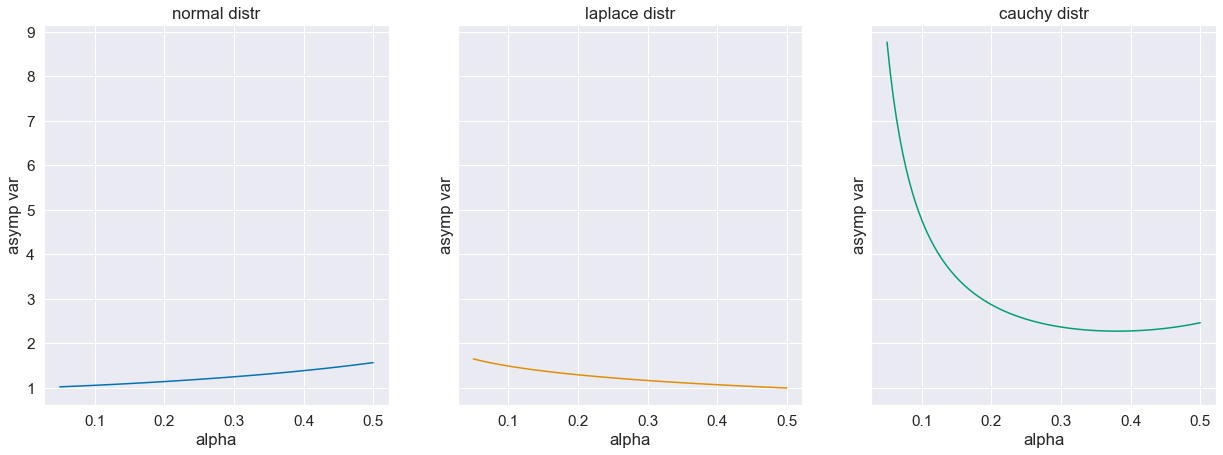

In [216]:
alpha_grid = np.linspace(0.05, 0.49999, 100)

#YOUR CODE GOES HERE
fig, axs = plt.subplots(1, 3, figsize=(21, 7), sharey=True)

for ind, (distr, color, name) in enumerate(zip(distrs, colors, names)):
    axs[ind].plot(
        alpha_grid,
        np.array([asymp_var(distr, alpha) for alpha in alpha_grid]),
        color=color
    )
    axs[ind].set_xlabel('alpha')
    axs[ind].set_ylabel('asymp var')
    axs[ind].set_title(f'{name} distr')

Как можно интепретировать такой график? Напишите развернутый вывод.

*Подсказка.* Подумайте, какой известной оценке соответствует усеченное среднее порядка 0.5? А порядка 0?

**Ответ:**

Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [217]:
#YOUR CODE GOES HERE
def visualization(sample, color):
    plt.figure(figsize=(15, 8))
    ns = np.arange(10, N)
    plt.plot(
        ns,
        [np.mean(sample[:n]) for n in ns],
        color=color
    )
    plt.plot(
        ns,
        [np.median(sample[:n]) for n in ns],
        linestyle=":",
        color=color
    )
    plt.plot(
        ns,
        [truncated_mean(sample[:n], alpha=0.35) for n in ns],
        linestyle="--",
        color=color
    )
    plt.xlabel('n')
    plt.ylabel('different averages')
    plt.show()

**Нормальное распределение**

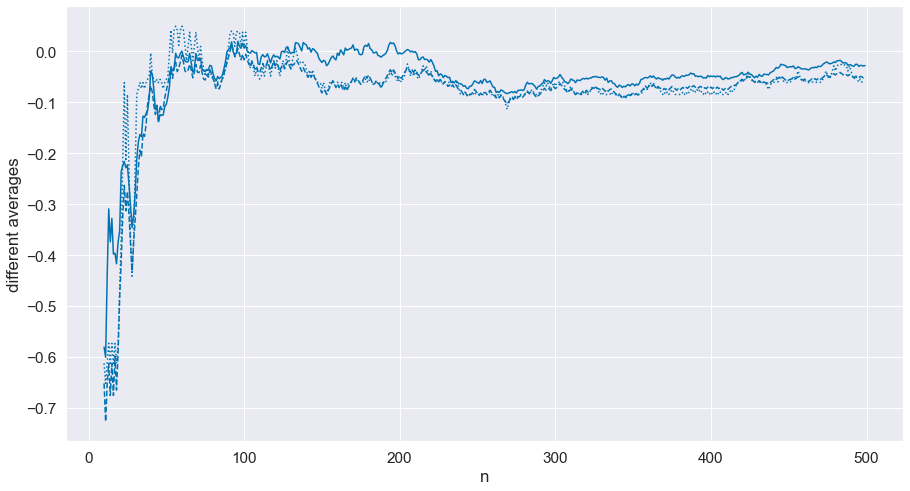

In [218]:
#YOUR CODE GOES HERE

visualization(norm_sample, color_for_normal)

**Распределение Лапласа**

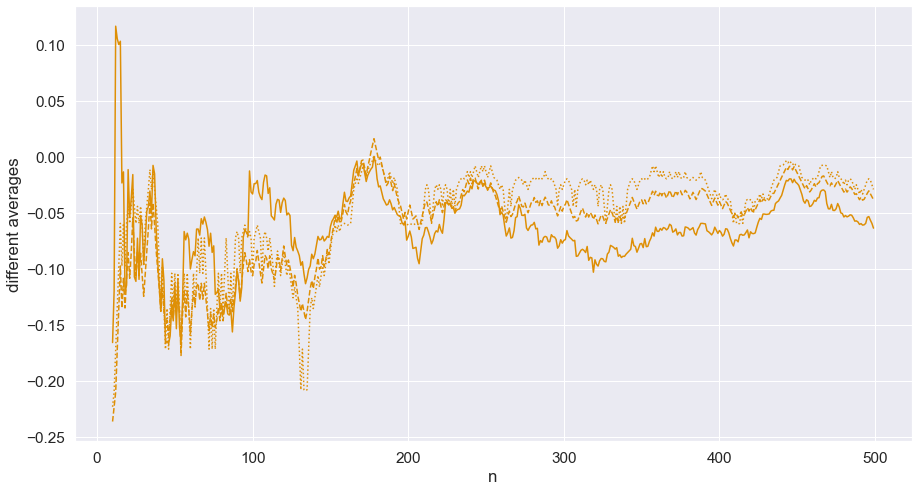

In [219]:
#YOUR CODE GOES HERE

visualization(laplacian_sample, color_for_laplace)

**Распределение Коши**

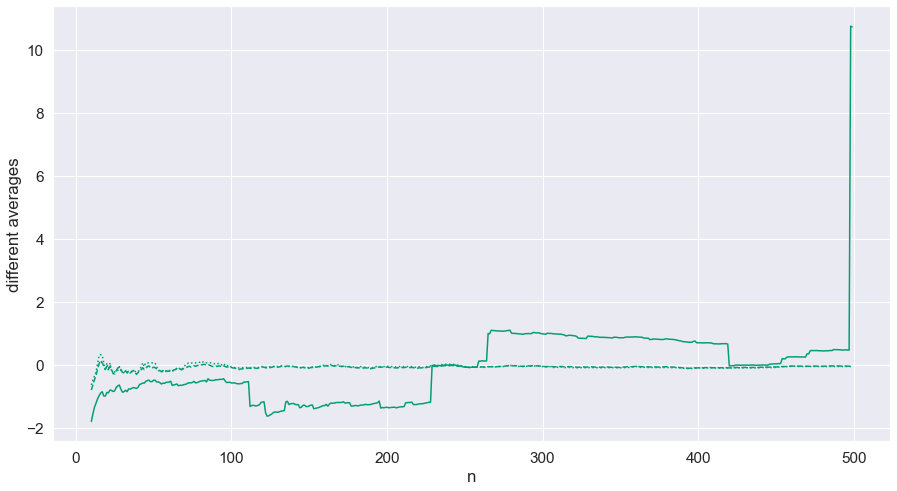

In [220]:
#YOUR CODE GOES HERE

visualization(cauchy_sample, color_for_cauchy)

Как эти три графика соотносятся с графиками асимптотической дисперсии усеченного среднего для всех этих распределений? Сделайте вывод.

**Вывод:**

# Задача 2

## Wine dataset

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье. 

In [221]:
# !pip3 install -q gdown
# !gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

In [222]:
import pandas as pd

In [223]:
data = pd.read_csv("winequality-red.csv")

In [224]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [225]:
def filt(alcohol):
    category = np.array([])
    for al in alcohol:
        if al <= 10:
            category = np.append(category, 'low alcohol')
        elif 10 < al <= 12:
            category = np.append(category, 'medium alcohol')
        if al > 12:
            category = np.append(category, 'high alcohol')
    return category

In [226]:
#YOUR CODE GOES HERE

data['category'] = filt(data.alcohol)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low alcohol
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low alcohol
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low alcohol
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,low alcohol
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low alcohol


Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [227]:
#YOUR CODE GOES HERE

data.groupby(['category'])['residual sugar'].mean()

category
high alcohol      2.760993
low alcohol       2.445984
medium alcohol    2.592264
Name: residual sugar, dtype: float64

In [228]:
data.groupby(['category'])['residual sugar'].median()

category
high alcohol      2.3
low alcohol       2.1
medium alcohol    2.2
Name: residual sugar, dtype: float64

Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:**

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

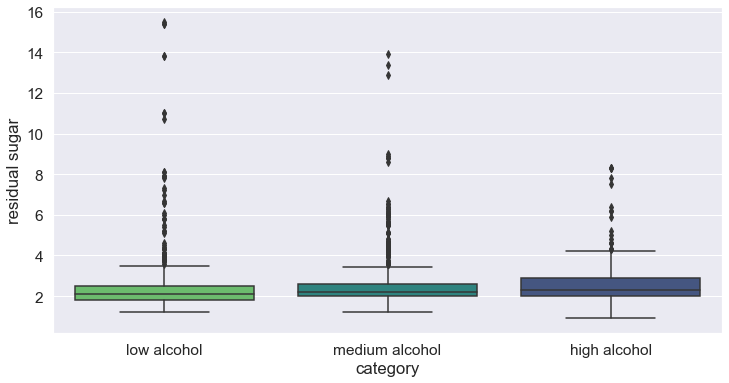

In [229]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]
#YOUR CODE GOES HERE

plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='residual sugar', data=data, palette=palette)

plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медииану или среднее? Почему?

**Ответ:**

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

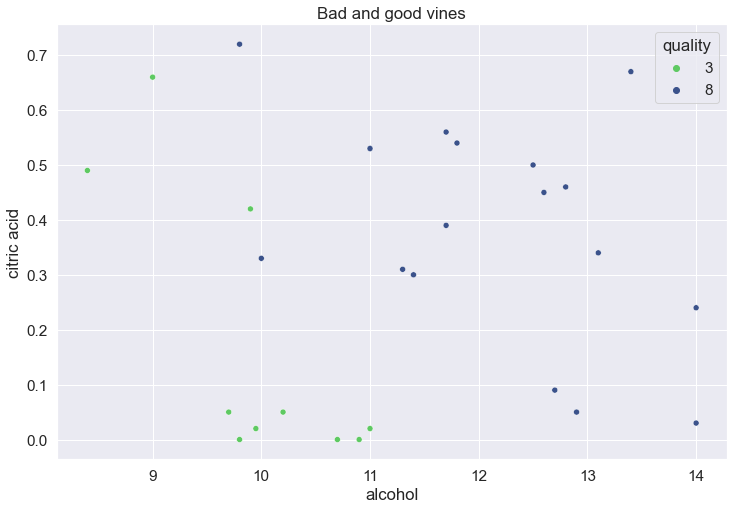

In [230]:
#YOUR CODE GOES HERE

plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='alcohol',
    y='citric acid',
    data=data.loc[data['quality'].isin([3, 8])],
    hue='quality',
    palette=[palette[0]] + [palette[-1]]
)

plt.title('Bad and good vines')

plt.show()

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [231]:
#YOUR CODE GOES HERE
bad = data.loc[data['quality'] == 3]
sample_bad = np.array([bad['alcohol'], bad['citric acid']])
good = data.loc[data['quality'] == 8]
sample_good = np.array([good['alcohol'], good['citric acid']])

mean_bad = np.mean(sample_bad, axis=1)
mean_good = np.mean(sample_good, axis=1)
cov_bad = np.cov(sample_bad)
cov_good = np.cov(sample_good)

In [232]:
bad_pdf = sps.multivariate_normal(mean_bad, cov_bad).pdf
good_pdf = sps.multivariate_normal(mean_good, cov_good).pdf

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [233]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

<ipython-input-234-ec5b71438a86>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colormesh_bad = plt.pcolormesh(
<ipython-input-234-ec5b71438a86>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colormesh_good = plt.pcolormesh(


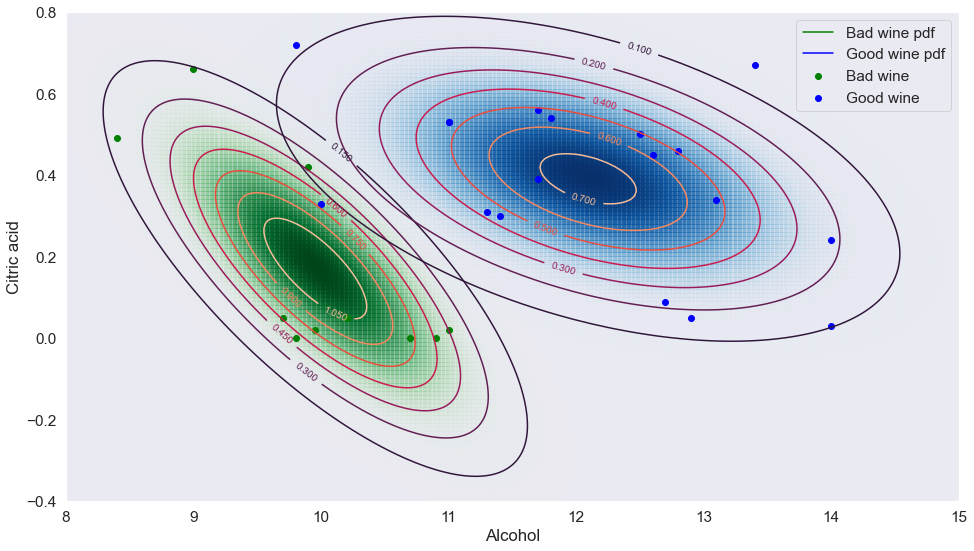

In [234]:
#YOUR CODE GOES HERE

plt.figure(figsize=(16, 9))
x, y = np.mgrid[8:15:0.01, -0.4:0.8:0.01]
pos = np.dstack((x, y))


c_bad = plt.contour(
    x,
    y,
    bad_pdf(pos)
)
c_good = plt.contour(
    x,
    y,
    good_pdf(pos)
)

colormesh_bad = plt.pcolormesh(
    x,
    y,
    bad_pdf(pos),
    cmap=get_density_cmap("Greens")
)

colormesh_good = plt.pcolormesh(
    x,
    y,
    good_pdf(pos),
    cmap=get_density_cmap("Blues")
)


plt.scatter(
    *sample_bad,
    color="green",
    label="Bad wine"
)
plt.scatter(
    *sample_good,
    color="blue",
    label="Good wine"
)


plt.plot(
    [],
    [],
    color="green",
    label="Bad wine pdf"
)
plt.plot(
    [],
    [],
    color="blue",
    label="Good wine pdf"
)

plt.clabel(c_bad)
plt.clabel(c_good)

plt.xlabel("Alcohol")
plt.ylabel("Citric acid")
plt.xlim(8, 15)
plt.legend()

plt.show()

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:**

# Задача 3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $\theta \in
    [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии
    произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. 

Функция правдоподобия 
$$f_\theta (X_1, \dots, X_n) = \theta ^ {\sum\limits_{i = 1}^n} (1 - \theta) ^ {n - \sum\limits_{i = 1}^n}$$ 

$$L_\theta(X_1, \dots, X_n) = \ln{\theta} \cdot \sum\limits_{i = 1}^n X_i + \ln{(1 - \theta)} \cdot (n - \sum\limits_{i = 1}^n X_i)$$

$$u_\theta(X) = \frac{\partial}{\partial \theta} L_\theta(X) = \frac{\sum\limits_{i = 1}^n}{\theta} - \frac{n - \sum\limits_{i = 1}^n}{1 - \theta}$$

Информация Фишера 
$$I(\theta) = E_\theta(u_\theta(X))^2 = \frac{n}{\theta (1 - \theta)}$$

Неравенство Рао-Краммера
$$Var_\theta\theta^* \geq \frac{1}{I_X(\theta)}
= \frac{\theta (1 - \theta)}{n}$$

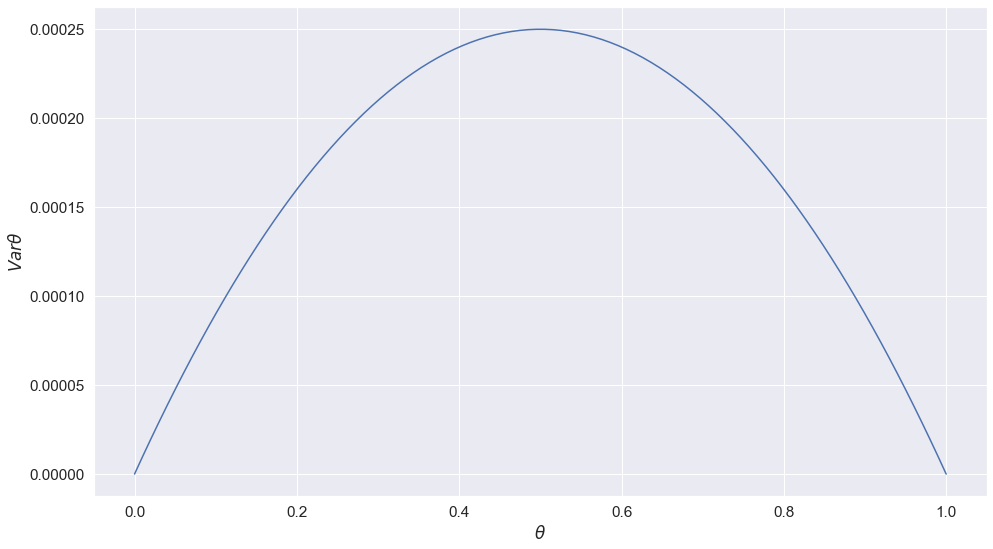

In [235]:
thetas = np.linspace(0, 1, 100)
var_lower_bound = thetas * (1 - thetas) / 1000

plt.figure(figsize=(16, 9))


plt.plot(
    thetas,
    var_lower_bound
)
plt.xlabel(f"$\\theta$")
plt.ylabel(f"$Var\\theta$")


plt.show()

Какой можно сделать вывод (напишите в комментариях)?

**Вывод**

 Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (количество бутстрепных выборок равно $1000$) этой эффективной оценки $\theta$.

In [236]:
def bootstrap_sample(sample):
    return np.random.choice(sample, size=sample.size)

In [237]:
n = 1000
variances = []
for theta in thetas:
    sample = sps.bernoulli(theta).rvs(size=n)
    bootstrap_samples = np.array([bootstrap_sample(sample) for i in range(n)])
    estimation = np.mean(bootstrap_samples, axis=0)
    variances.append(np.std(estimation))

 Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

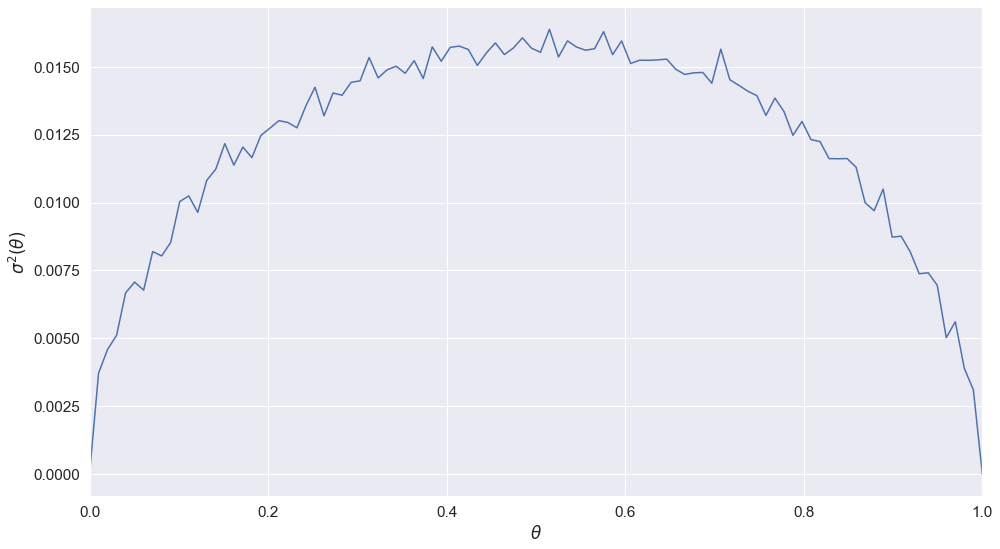

In [238]:
plt.figure(figsize=(16, 9))

plt.plot(
    thetas,
    variances
)

plt.xlabel(f'$\\theta$')
plt.ylabel(f'$\sigma^2(\\theta)$')
plt.xlim(0, 1)

plt.show()

**Вывод**